In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
knnData=pd.read_csv('/Users/utkarshkhanna/Downloads/Refactored_Py_DS_ML_Bootcamp-master 2/14-K-Nearest-Neighbors/ClassifiedData',index_col=0)

In [9]:
knnData.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()

In [12]:
scaler.fit(knnData.drop('TARGET CLASS', axis=1))

StandardScaler()

In [13]:
scaled_features=scaler.transform(knnData.drop('TARGET CLASS',axis=1))

In [15]:
df_scaled=pd.DataFrame(scaled_features, columns=knnData.columns[:-1])

In [16]:
df_scaled

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X=df_scaled
y=knnData['TARGET CLASS']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
knn=KNeighborsClassifier()

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
pred=knn.predict(X_test)

In [28]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[154   5]
 [ 12 129]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       159
           1       0.96      0.91      0.94       141

    accuracy                           0.94       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



### The model is working well, but we will try to check if we can have a better k-value using Elbow Method.

In [30]:
error=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))


Text(0, 0.5, 'Error Rate')

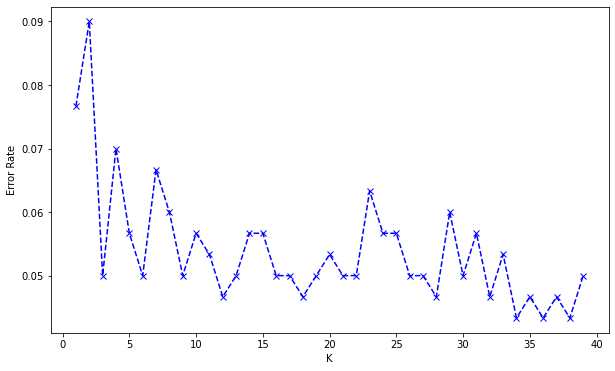

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,color='blue',linestyle='dashed',marker='x',markersize=6)
plt.xlabel('K')
plt.ylabel('Error Rate')


### Value of k set as 17, as per the graph

In [40]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
pred=knn.predict(X_test)
print('CONFUSION MATRIX: ')
print(confusion_matrix(y_test,pred))
print('CLASSIFICATION REPORT: ')
print(classification_report(y_test,pred))

CONFUSION MATRIX: 
[[153   6]
 [  9 132]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



### Value of k as 36, as it seems to be lowest

In [41]:
knn=KNeighborsClassifier(n_neighbors=36)
knn.fit(X_train, y_train)
pred=knn.predict(X_test)
print('CONFUSION MATRIX: ')
print(confusion_matrix(y_test,pred))
print('CLASSIFICATION REPORT: ')
print(classification_report(y_test,pred))

CONFUSION MATRIX: 
[[153   6]
 [  7 134]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

